In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings('ignore')

# -----------------Simple Linear Regression--------------------------------

In [3]:
dataset ="D:\ML_NOTE_DATASET\Regression\placement.csv"

In [4]:
df = pd.read_csv(dataset)
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


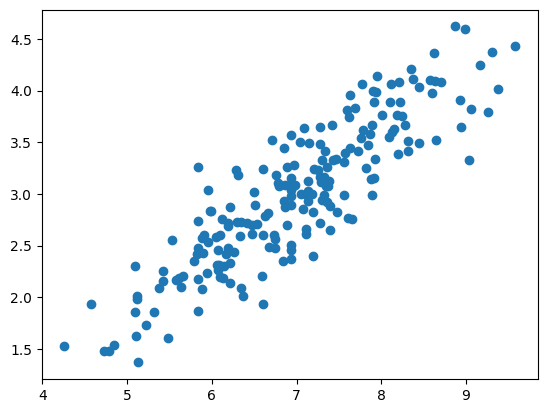

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['package'])

In [6]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [10]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [11]:
X_test.iloc[0].values

array([8.58])

In [12]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

array([3.89111601])

In [13]:
lr.predict([[8.58]])

array([3.89111601])

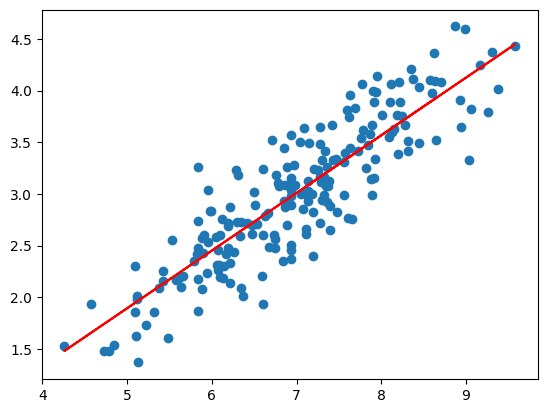

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'], df['package'])

plt.plot(X_train, lr.predict(X_train), color = 'red')

## geometric Instution
y = mx + c

In [15]:
slope_m = lr.coef_
slope_m

array([0.55795197])

In [16]:
intercept = lr.intercept_
intercept

np.float64(-0.8961119222429144)

In [17]:
lr.predict([[8.58]])

array([3.89111601])

In [18]:
slope_m * 8.58 + intercept

array([3.89111601])

## Error Metrics

In [19]:
r2 = lr.score(X_test,y_test)
r2

0.780730147510384

In [75]:
## Adjusted R2
## record number
n = X_test.shape[0]

## number of predictor
p = X_test.shape[1]

## number of column
k = len(X_train.columns)

1 - (1 - r2) *((n-1)/(n-p-1))

0.38242363001960145

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
y_predict = lr.predict(X_test)
y_predict

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [23]:
mean_absolute_error(y_test,y_predict)

0.2884710931878175

In [24]:
mean_squared_error(y_test,y_predict)

0.12129235313495527

In [25]:
r2_score(y_test,y_predict)

0.780730147510384

# ----------------- Multiple  Linear Regression--------------------------------

In [40]:
from sklearn.datasets import load_diabetes

In [41]:
diabetes = load_diabetes()

In [42]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [43]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [44]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [45]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [46]:
df['target'] = diabetes.target

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [49]:
X = df.iloc[:,0:-1]
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [50]:
y = df.iloc[:,-1]
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [56]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(353, 10)

In [57]:
y_train.shape

(353,)

In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [78]:
y_test

287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
       ...  
255    153.0
90      98.0
57      37.0
391     63.0
24     184.0
Name: target, Length: 89, dtype: float64

In [81]:
lr.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [68]:
lr.intercept_

np.float64(151.34560453985995)

In [82]:
y_predict = lr.predict(X_test)
r2 = r2_score(y_test,y_predict)

## Error Calulation

In [84]:
mae = mean_absolute_error(y_test, y_predict)
mae

42.79409467959994

In [85]:
mse = mean_squared_error(y_test, y_predict)
mse

2900.1936284934814

In [88]:
rmse = np.sqrt(mse)
rmse

np.float64(53.85344583676593)

## Accuracy

In [92]:
r2 = r2_score(y_test, y_predict)

In [93]:
## Adjusted R2 score 
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.38242363001960145

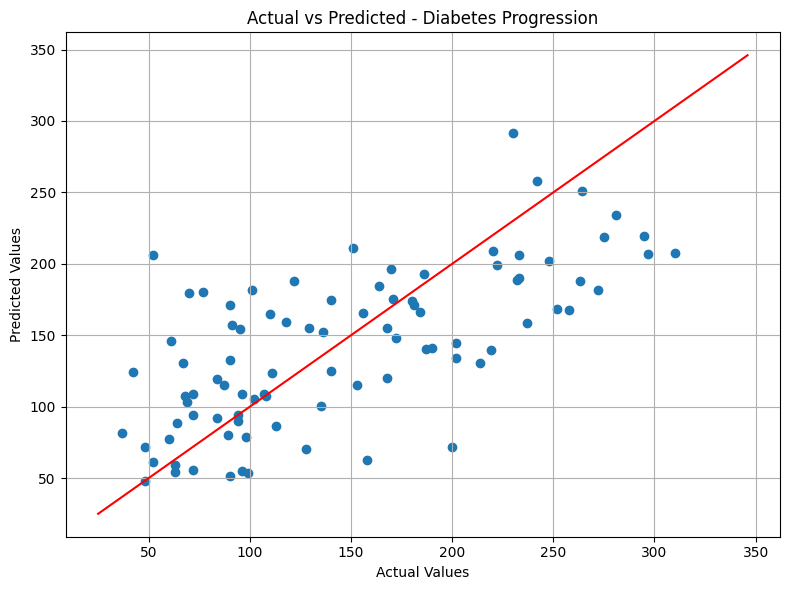

In [99]:
# 7. Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Diabetes Progression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # reference line

plt.grid(True)
plt.tight_layout()
plt.show()
